Task 4: Outlier detection: from the original dataset (i.e. the raw records with all attributes, not the time series built only on the “PT08.S1(CO)” attribute), identify the top 1% outliers. Adopt at least two different methods belonging to different families (i.e. model-based, distance-based, density-based, angle-based, …) to identify the 1% of input records with the highest likelihood of being outliers, and compare the results. Before doing the analysis, the records containing missing values should be deleted to avoid trivial results.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set()

df = pd.read_csv('AirQualityUCI.csv',sep=';',decimal=',')
df = df.dropna(axis=0, how='all')
df = df.iloc[:,2:15]
df.columns=['co','pt1','nmhc','c6h6','pt2','nox','pt3','no2','pt4','pt5','t','rh','ah']
df=df.apply(pd.to_numeric)
df.head()

,co,pt1,nmhc,c6h6,pt2,nox,pt3,no2,pt4,pt5,t,rh,ah
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


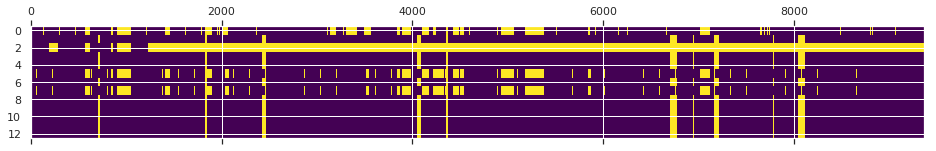

In [3]:
no = df==-200
no= no.replace(to_replace =False,value ='0') 
no= no.replace(to_replace =True,value ='1') 
no=no.apply(pd.to_numeric)
plt.matshow(no.T, interpolation=None, aspect='auto', cmap='viridis')


In [4]:
len(df)

9357

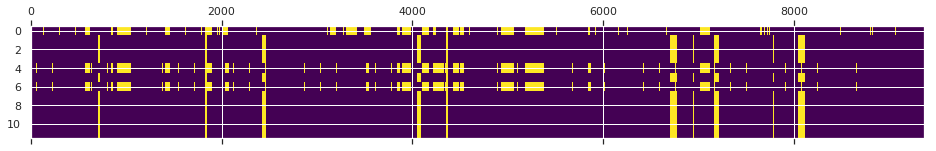

In [5]:
df = df.drop('nmhc', axis=1)

no = df==-200
no= no.replace(to_replace =False,value ='0') 
no= no.replace(to_replace =True,value ='1') 
no=no.apply(pd.to_numeric)
plt.matshow(no.T, interpolation=None, aspect='auto', cmap='viridis')


In [6]:
no['sum']=[sum(no.iloc[i]) for i in range(len(no))]
elimina = no[no['sum']>0].index
print(elimina)

Int64Index([   9,   10,   33,   34,   39,   57,   58,   81,   82,  105,
            ...
            8821, 8822, 8842, 8914, 8986, 9058, 9130, 9202, 9274, 9346],
           dtype='int64', length=2416)


In [7]:
df= df.drop(elimina,axis=0)
len(df)

6941

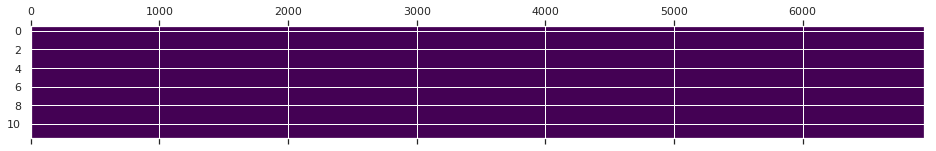

In [8]:
no = df==-200
no= no.replace(to_replace =False,value ='0') 
no= no.replace(to_replace =True,value ='1') 

no=no.apply(pd.to_numeric)
plt.matshow(no.T, interpolation=None, aspect='auto', cmap='viridis')

In [9]:
print(len(df)/100)

69.41


In [10]:
df = df.reset_index()
df = df.drop('index',axis=1)
df.head()

,co,pt1,c6h6,pt2,nox,pt3,no2,pt4,pt5,t,rh,ah
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


# NN

In [11]:
from scipy.spatial import distance_matrix
dflist= [list(df.iloc[i,:]) for i in range(len(df))]
matdist = pd.DataFrame(distance_matrix(dflist,dflist))
stats = matdist.describe()
pd.DataFrame(stats.loc['mean']).describe()

,mean
count,6941.000000
mean,891.552162
std,239.076725
min,635.058935
25%,728.125874
50%,814.780317
75%,972.408987
max,2535.686085


In [12]:
#nearpts20: per ogni punto le distanze dei primi 20 vicini

nearpts20 = pd.DataFrame(list(matdist.iloc[:,0].sort_values()[:20]))

for i in range(len(matdist)-1):
    i=i+1
    nearpts20[str(i)]=list(matdist.iloc[:,i].sort_values()[:20])
    
nearpts20.head()

,0,1,2,3,4,5,6,7,8,9,...,6931,6932,6933,6934,6935,6936,6937,6938,6939,6940
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,140.284569,125.066835,99.407094,144.538168,123.464215,126.228779,53.167002,53.164187,171.223920,197.550272,...,50.416874,56.073181,90.482133,89.312066,81.439243,86.755582,78.766980,98.428608,84.336913,142.912496
2,155.261071,131.050761,101.945133,149.415030,163.861574,151.292956,66.100078,53.167002,182.066226,213.335103,...,65.691253,65.695206,98.234025,96.267150,89.199388,103.686330,86.973908,100.145160,116.116333,154.404183
3,165.225364,135.375320,149.415030,158.003884,165.634544,169.042316,141.780099,117.863859,193.659753,225.112334,...,69.765913,72.228103,113.676771,101.830813,98.514478,112.876431,87.020074,117.688612,118.509346,158.852038
4,166.557312,142.916412,158.876841,165.225364,187.351178,180.700334,165.613391,140.842844,194.919392,248.987493,...,76.590094,82.681718,120.718303,105.573554,102.450525,123.325750,87.207856,119.706981,136.909424,160.478698


In [13]:
print('distanza minima e massima del 20 vicino')
print(min(nearpts20.iloc[19,:]), max(nearpts20.iloc[19,:]))

distanza minima e massima del 20 vicino
65.51313235344499 893.5541940088245


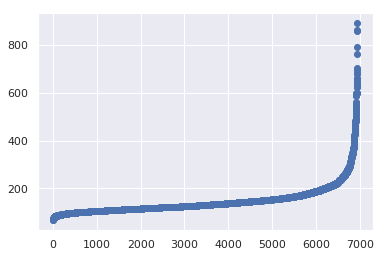

In [14]:
plt.scatter(range(len(df)),nearpts20.iloc[19,:].sort_values())

In [16]:
eps=220

#near è la colonna di quanti sono i vicini piu vicini di 220

df['near']= [sum(matdist.iloc[i,:]<eps) for i in range(len(df))]

In [17]:
df.sort_values('near').head()

,co,pt1,c6h6,pt2,nox,pt3,no2,pt4,pt5,t,rh,ah,near
484,3.3,1308.0,16.4,1193.0,163.0,793.0,106.0,1193.0,1187.0,23.6,27.5,0.7913,1
3817,3.7,1407.0,17.8,1235.0,338.0,548.0,77.0,1780.0,2519.0,20.1,71.1,1.6498,1
2190,3.9,1213.0,21.1,1327.0,251.0,654.0,155.0,1864.0,2021.0,34.2,17.9,0.9444,1
4463,3.2,1202.0,13.0,1083.0,629.0,1376.0,143.0,1410.0,1340.0,11.0,74.4,0.9736,1
4011,6.8,1578.0,32.3,1605.0,1247.0,429.0,211.0,2032.0,1643.0,9.9,83.4,1.0194,1


In [18]:
#i più 70 outliers

top_nn=df.sort_values('near')[:70].index

In [19]:
len(top_nn)

70

#### Mahala

In [20]:
from numpy.linalg import inv
from scipy.spatial import distance

In [21]:
type(datidf.iloc[4,11])

NameError: name 'datidf' is not defined

In [302]:
datidf = df.iloc[:,:12]
matcov = np.zeros((12,12))


for i in range(12):
    matcov[i,i]=1
    for k in range(i+1,12):
        x = [datidf.iloc[:,i].values,datidf.iloc[:,k].values]
        matcov[i,k]=np.cov(x)[0,1]
        matcov[k,i]=np.cov(x)[0,1]
        
iv = inv(matcov)


In [293]:
np.linalg.det(inv(matcov))

-2.248777145100268e-38

In [289]:
distance.mahalanobis(np.random.rand(12),np.random.rand(12), iv)

nan

In [318]:
datidf = pd.DataFrame([[1,2,3],
                  [3,4,-5],
                  [0,0.9,8],
                  [4,-5,6]])
matcov = np.zeros((3,3))


for i in range(3):
    matcov[i,i]=1
    for k in range(i+1,3):
        x = [datidf.iloc[:,i].values,datidf.iloc[:,k].values]
        matcov[i,k]=np.cov(x)[0,1]
        matcov[k,i]=np.cov(x)[0,1] 
        
iv = inv(matcov)
iv


array([[ 0.33472768, -0.10046021, -0.08427557],
       [-0.10046021,  0.02514299, -0.04564849],
       [-0.08427557, -0.04564849,  0.01621071]])

In [341]:
    
iv = inv(matcov)
distance.mahalanobis(np.random.rand(3),np.random.rand(3), iv)

nan

# dbscan

In [22]:
from sklearn.cluster import DBSCAN


In [23]:
datidbdf=df.iloc[:,:12]

In [24]:
datidb =np.array([df.iloc[i,:12] for i in range(len(datidbdf))])

In [25]:
datidb[:10]

array([[2.600e+00, 1.360e+03, 1.190e+01, 1.046e+03, 1.660e+02, 1.056e+03,
        1.130e+02, 1.692e+03, 1.268e+03, 1.360e+01, 4.890e+01, 7.578e-01],
       [2.000e+00, 1.292e+03, 9.400e+00, 9.550e+02, 1.030e+02, 1.174e+03,
        9.200e+01, 1.559e+03, 9.720e+02, 1.330e+01, 4.770e+01, 7.255e-01],
       [2.200e+00, 1.402e+03, 9.000e+00, 9.390e+02, 1.310e+02, 1.140e+03,
        1.140e+02, 1.555e+03, 1.074e+03, 1.190e+01, 5.400e+01, 7.502e-01],
       [2.200e+00, 1.376e+03, 9.200e+00, 9.480e+02, 1.720e+02, 1.092e+03,
        1.220e+02, 1.584e+03, 1.203e+03, 1.100e+01, 6.000e+01, 7.867e-01],
       [1.600e+00, 1.272e+03, 6.500e+00, 8.360e+02, 1.310e+02, 1.205e+03,
        1.160e+02, 1.490e+03, 1.110e+03, 1.120e+01, 5.960e+01, 7.888e-01],
       [1.200e+00, 1.197e+03, 4.700e+00, 7.500e+02, 8.900e+01, 1.337e+03,
        9.600e+01, 1.393e+03, 9.490e+02, 1.120e+01, 5.920e+01, 7.848e-01],
       [1.200e+00, 1.185e+03, 3.600e+00, 6.900e+02, 6.200e+01, 1.462e+03,
        7.700e+01, 1.333e+03, 7.

In [26]:
from sklearn.metrics import *
from sklearn.cluster import DBSCAN

xx = np.linspace(1, 300, 200)
yy = list()
for eps in xx:
    dbscan = DBSCAN(eps, min_samples=3, metric='euclidean')
    dbscan.fit(datidb)
    labels = dbscan.labels_
    # yy = size of noise cluster
    yy.append(float(len([1 for i in labels if i == -1])) / len(datidb))


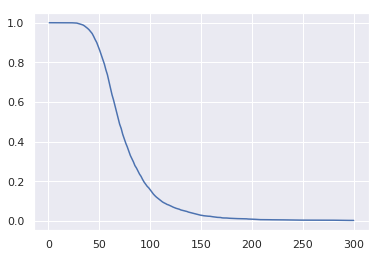

In [27]:
plt.plot(xx, yy)

In [28]:
my_eps = min( [ xx[i] for i in range(len(xx)) if yy[i]<0.01] )
print( my_eps)

193.321608040201


In [29]:
my_eps=192

In [30]:
dbscan = DBSCAN(my_eps, min_samples=3, metric='euclidean')
dbscan.fit(datidb)
labels = dbscan.labels_
noise = np.array([ datidb[i] for i in range(len(datidb)) if labels[i]==-1])


In [31]:
datidbdf['noise']=(labels==-1)

In [32]:
top_dbscan = datidbdf[datidbdf.noise==True].index

In [33]:
#confronto nn/db

print("quantità noise", len(noise))
print('intersezione db/nn', len(set(top_dbscan).intersection(set(top_nn))))

quantità noise 70
intersezione db/nn 53


# LOF


In [44]:
from sklearn.neighbors import LocalOutlierFactor


In [66]:
clf = LocalOutlierFactor(n_neighbors=20)
y_pred = clf.fit_predict(df.iloc[:,:12])

/home/gambit/.local/lib/python3.6/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


In [71]:
pd.DataFrame([-clf.negative_outlier_factor_, y_pred])

,0,1,2,3,4,5,6,7,8,9,...,6931,6932,6933,6934,6935,6936,6937,6938,6939,6940
0,1.143993,1.150184,1.273289,1.200221,1.304842,1.340046,1.252157,1.206764,1.261409,1.519918,...,1.020748,1.007747,1.038128,1.021017,0.977884,1.057127,0.991852,1.081721,1.302996,1.32647
1,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.00000


In [73]:
df['lof_fac']=-clf.negative_outlier_factor_

In [81]:
top_lof= df.sort_values('lof_fac', ascending=False)[:70].index

In [85]:

print('intersezione db/nn', len(set(top_dbscan).intersection(set(top_nn))))
print('intersezione db/lof', len(set(top_dbscan).intersection(set(top_lof))))
print('intersezione lof/nn', len(set(top_lof).intersection(set(top_nn))))
print(len(top_lof))

intersezione db/nn 53
intersezione db/lof 34
intersezione lof/nn 35
70


In [65]:
(y_pred==-1)

694

In [55]:
len(y_pred)

6941

In [34]:
#numero di vicini degli outlier classificati con dbscan

set(df.near[top_dbscan])

df.near[top_dbscan].value_counts()


1    27
2    19
3    14
4     4
5     3
6     2
8     1
Name: near, dtype: int64

In [35]:
df.near[top_nn].value_counts()


1    27
2    26
3    17
Name: near, dtype: int64

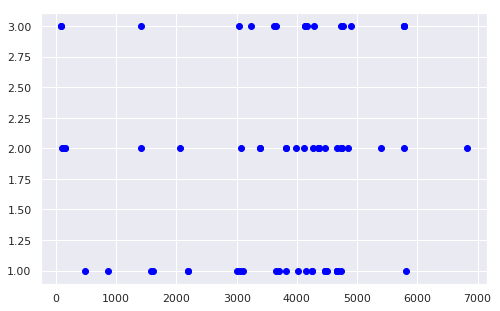

In [36]:
plt.figure(num=None, figsize=(8,5))
       
plt.scatter(top_nn,df.near[top_nn], marker='o', c='blue')


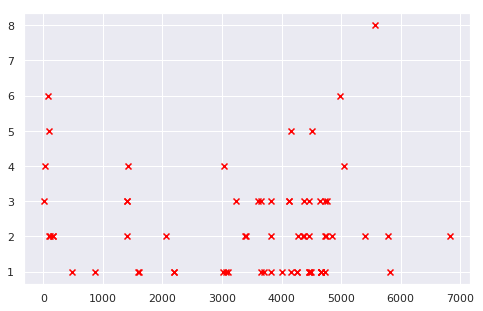

In [37]:
plt.figure(num=None, figsize=(8,5))

plt.scatter(top_dbscan,df.near[top_dbscan], marker='x', c='red')

In [38]:
len(datidbdf)

6941

In [39]:
len(df)

6941

In [40]:
dbnoise = datidbdf[['noise']]
nnear=df[['near']]

In [41]:
np.where(df.near[top_nn]==1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),)

In [42]:
df['noise']=datidbdf.noise
sortedout = df.sort_values('near')[['near','noise']]

In [43]:
foundlast=0
i=len(sortedout)-1


while foundlast==0:
    if sortedout.iloc[i,1]==True:
        foundlast=i
    i=i+1
    
foundlast

IndexError: single positional indexer is out-of-bounds

In [517]:
sum(sortedout.noise)

70

In [518]:
sum(sortedout.noise[:300])

70

In [494]:
df.iloc[top_nn,:][['near','noise']].head()

,near,noise
484,1,True
3817,1,True
2190,1,True
4463,1,True
4011,1,True


In [460]:
np.where(df.near[top_dbscan]==1)

(array([ 8,  9, 14, 15, 17, 18, 19, 21, 22, 27, 29, 31, 33, 37, 38, 39, 44,
        46, 48, 49, 52, 53, 54, 55, 56, 58, 68]),)